# Project 2: DATA1010
### Rubric

| Section | Task                                                | Required in Code | Required in Report | Points |
|---------|-----------------------------------------------------|------------------|---------------------|--------|
|     | **Data Preparation**                                |                  |                     |        |
| 2.1.    | Check and report any data issues                   | Yes              | Yes                 | 5      |
| 2.2.    | Convert the categorical feature `class` to numeric | Yes              | No                  | 5      |
|     | **Linear Regression**                               |                  |                     |        |
| 3.2.1.  | Compute the regression coefficients                 | Yes              | Yes                 | 5      |
| 3.2.2.  | Evaluate the regression loss using MSE and MAE      | Yes              | Yes                 | 5      |
| 3.3.1.  | Visualize the effect of varying bias               | Yes              | Yes                 | 5      |
| 3.3.2.  | Analyze the effect of varying bias                 | No               | Yes                 | 5      |
| 3.4.1.  | Identify all possible subsets of 6 features        | Yes              | No                  | 5      |
| 3.4.2.  | Compute the regression coefficients for each subset | Yes              | Yes                 | 5      |
| 3.4.3.  | Evaluate the regression loss for each subset       | Yes              | Yes                 | 5      |
| 3.4.4.  | Analyze and compare the performance across subsets | Yes              | Yes                 | 5      |
|     | **Classification**                                  |                  |                     |        |
| 4.2.1.  | Convert labels for logistic regression             | Yes              | No                  | 5      |
| 4.2.2.  | Fit the logistic regression model                  | Yes              | Yes                 | 5      |
| 4.2.3.  | Evaluate the logistic regression model             | Yes              | Yes                 | 5      |
| 4.2.4.  | Report and comment on the results                  | No               | Yes                 | 5      |
| 4.3.1.  | Fit the SVM model                                  | Yes              | Yes                 | 5      |
| 4.3.2.  | Evaluate the SVM model                             | Yes              | Yes                 | 5      |
| 4.4.1.  | Evaluate the sensitivity of models                 | Yes              | Yes                 | 5      |
| 4.4.2.  | Perform the sensitivity analysis                    | Yes              | Yes                 | 5      |
|     | **Comprehensiveness**                               |                  |                     |        |
|         | Present the code and written report               | Yes              | Yes                 | 10     |
| **Total** |                                                   |                  |                     | **100** |


### Deduction Rules

- **Half a point deduction per issue per question for the following:**
    - Graphs or figures without proper titles, labels, or explanations.
    - Content in the written report that is too small or difficult to read (Tip: print out your report and attempt to read it with the bare eyes).
    - Code screenshots taken in dark mode.
    - Code lacking proper sections or comments.

- **A deduction of at least 10/100 of the total points for the following issues:**
    - Lack of proper references.
    - Code link not provided, not runnable, or unauthorized.


# 1. Load dataset

*Please do not edit this cell.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Load Diabetes Dataset from OpenML
diabetes = fetch_openml(name='diabetes', version=1, as_frame=True)
df = diabetes.frame
print("\nDiabetes Dataset:")

# Exploratory Data Analysis (EDA)
print("Info\n",df.info())
print("Head\n",df.head())
print("Describe\n",df.describe())
print("Data\n",df)


Diabetes Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   preg    768 non-null    int64   
 1   plas    768 non-null    int64   
 2   pres    768 non-null    int64   
 3   skin    768 non-null    int64   
 4   insu    768 non-null    int64   
 5   mass    768 non-null    float64 
 6   pedi    768 non-null    float64 
 7   age     768 non-null    int64   
 8   class   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB
Info
 None
Head
    preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.28

# 2. Data Preparation (10 points)


## 2.1. Check and report any data issues  (5 points)
Identify and report any missing values, duplicates, or inconsistencies in the dataset.  


In [4]:
# Place your code for 2.1. here
df.describe(include='all')

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tested_negative
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,NaN
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,NaN


In [13]:
df['class'].value_counts()

class
tested_negative    500
tested_positive    268
Name: count, dtype: int64

In [10]:
df['age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   preg    768 non-null    int64   
 1   plas    768 non-null    int64   
 2   pres    768 non-null    int64   
 3   skin    768 non-null    int64   
 4   insu    768 non-null    int64   
 5   mass    768 non-null    float64 
 6   pedi    768 non-null    float64 
 7   age     768 non-null    int64   
 8   class   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


## 2.2. Convert the categorical feature `class` to numeric (5 points)
Transform the categorical featue 'class' into a numeric format
*   'tested_positive' $\rightarrow 1$
*   'tested_negative' $\rightarrow -1$

In [14]:
# Place your code for 2.2. here
df['class'] = df['class'].replace({'tested_negative': -1, 'tested_positive': 1})
df.head()

C:\Users\jimmy\AppData\Local\Temp\ipykernel_20628\1291186112.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'tested_negative': -1, 'tested_positive': 1})
C:\Users\jimmy\AppData\Local\Temp\ipykernel_20628\1291186112.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['class'] = df['class'].replace({'tested_negative': -1, 'tested_positive': 1})


,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,-1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,-1
4,0,137,40,35,168,43.1,2.288,33,1


# 3. Linear Regression Model (40 points)

Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features). In this example, we will use the `plas` (plasma glucose concentration) as the target and the remaining (without `class`) as features. It assumes a linear relationship between the variables, which can be represented as:
$$
y = X \cdot \beta + \beta_0 + \epsilon,
$$

where:
- $y$ is the target variable (dependent variable: plasma glucose concentration).
- $X$ is the feature matrix (independent variables: age, BMI, etc.).
- $\beta_0$ is the bias term (intercept).
- $\beta$ is the regression vector (coefficients or weights).
- $\epsilon$ is the error term (the difference between predicted and actual values).

The goal of linear regression is to find the best regression vector $\beta$ and bias term $\beta_0$ that minimize the error term $\epsilon$, which can be evaluated using metrics like **Mean Squared Error (MSE)** and **Mean Absolute Error (MAE)**.

1. **Mean Squared Error (MSE)**:
   
   MSE measures the average squared difference between the predicted values $\hat{y}$ and the actual values $y$. It is defined as:

   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$


2. **Mean Absolute Error (MAE)**:
   
   MAE measures the average absolute difference between the predicted values $\hat{y}$ and the actual values $y$. It is defined as:

   $$
   \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
   $$


Here,
- $n$ is the number of samples.
- $y_i$ is the actual value for the $i$-th sample.
- $\hat{y}_i$ is the predicted value for the $i$-th sample.


*Please do not edit this cell.*

In [15]:
# Prediction function using X, beta, and bias (beta_0)
def predict(X, beta, beta_0):
    return beta_0 + np.dot(X, beta)

# Mean Squared Error (MSE) Function using X, y, beta, and beta_0
def mean_squared_error(X, y, beta, beta_0):
    y_pred = predict(X, beta, beta_0)
    return np.mean((y - y_pred) ** 2)

# Mean Absolute Error (MAE) Function using X, y, beta, and beta_0
def mean_absolute_error(X, y, beta, beta_0):
    y_pred = predict(X, beta, beta_0)
    return np.mean(np.abs(y - y_pred))


## 3.1 Data Splitting
We will split dataset into training and testing datasets.

*Please do not edit this cell.*


Shape of training set (X_train_reg): (614, 7)
Shape of testing set (X_test_reg): (154, 7)

Missing values in the training set:
preg    0
pres    0
skin    0
insu    0
mass    0
pedi    0
age     0
dtype: int64 0

Missing values in the testing data:
preg    0
pres    0
skin    0
insu    0
mass    0
pedi    0
age     0
dtype: int64 0


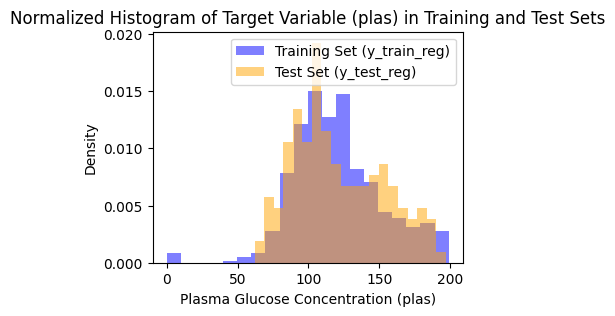

In [30]:
# Splitting Data for Regression Task
X_reg = df.drop(columns=['class', 'plas'])  # Features
y_reg = df['plas'].astype(float)  # Target (plas column is now the target for regression)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Printing the shape of train and test sets
print("\nShape of training set (X_train_reg):", X_train_reg.shape)
print("Shape of testing set (X_test_reg):", X_test_reg.shape)

# Checking for missing values in the training data
print("\nMissing values in the training set:")
print(X_train_reg.isnull().sum(), y_train_reg.isnull().sum())

# Checking for missing values in the testing data
print("\nMissing values in the testing data:")
print(X_test_reg.isnull().sum(), y_test_reg.isnull().sum())

# Plotting normalized histograms of y_train_reg and y_test_reg
plt.figure(figsize=(4, 3))
plt.hist(y_train_reg, bins=20, alpha=0.5, label='Training Set (y_train_reg)', color='blue', density=True)
plt.hist(y_test_reg, bins=20, alpha=0.5, label='Test Set (y_test_reg)', color='orange', density=True)

# Adding labels and title
plt.xlabel('Plasma Glucose Concentration (plas)')
plt.ylabel('Density')
plt.title('Normalized Histogram of Target Variable (plas) in Training and Test Sets')
plt.legend(loc='upper right')

# Show the plot
plt.show()

## 3.2. Fit model (10 points)



### 3.2.1. Compute the regression coefficients ($\beta$) and intercept ($\beta_0$) using linear regression.  (5 points)
*Edit the cell below to find $\beta$ and $\beta_0$. Print out the results.*

In [27]:
# Random coefficients and bias for the features (to be replaced)
beta = [-0.1, -0.8, 1.0, -1.0, -1.5, 0.5, -2.0 ]
beta_0 = 0.02
# Output the random values
print(f"beta first: {beta}")
print(f"beta_0 first: {beta_0}")
print()
#Sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train_reg, y_train_reg)
beta = model.coef_
beta_0 = model.intercept_
print(beta.shape)
# Output the random values
print(f"beta: {beta}")
print(f"beta_0: {beta_0}")

beta first: [-0.1, -0.8, 1.0, -1.0, -1.5, 0.5, -2.0]
beta_0 first: 0.02

(7,)
beta: [ 0.1152807   0.09519348 -0.4401416   0.10645482  0.76516923  8.17146551
  0.65044468]
beta_0: 64.41390174439498


### 3.2.2. Evaluate the regression loss using MSE and MAE (5 points)
*Edit the cell below to find MSE and MAE. Print out the results.*

In [24]:
# Calculate MSE and MAE for both training and test sets using custom functions
# Train set error
train_mse = mean_squared_error(X_train_reg, y_train_reg, beta, beta_0)
train_mae = mean_absolute_error(X_train_reg, y_train_reg, beta, beta_0)

# Test set error
test_mse = mean_squared_error(X_test_reg, y_test_reg, beta, beta_0)
test_mae = mean_absolute_error(X_test_reg, y_test_reg, beta, beta_0)

# Output the results
print(f"Linear Regression: \nTrain MSE: {train_mse}, Train MAE: {train_mae}")
print(f"Test MSE: {test_mse}, Test MAE: {test_mae}")

Linear Regression: 
Train MSE: 768.1603230157449, Train MAE: 20.936582691929342
Test MSE: 869.4777053181734, Test MAE: 23.225630429657286


## 3.3. Linear Regression - Bias Analysis (10 points)


### 3.3.1. Visualize the effect of varying bias (5 points)
- Keep the regression coefficients ($\beta$) fixed and vary the bias term ($\beta_0$).
- Plot the relationship between varying $\beta_0$ and the corresponding errors MSE and MAE.

---
*Below is a sample code for MSE.*


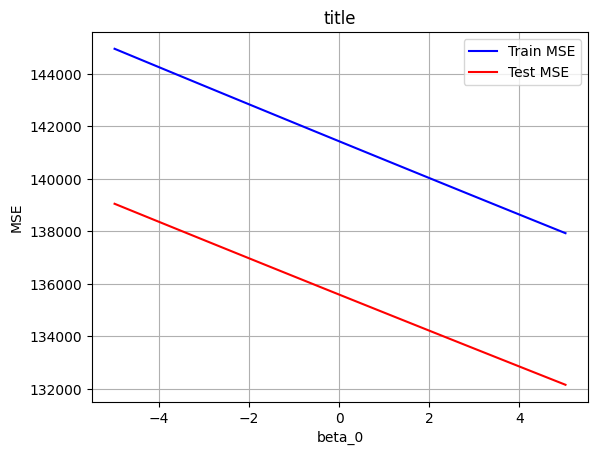

In [ ]:
# Choose a suitable range of values for beta_0 around the pre-defined beta_0
beta_0_values = np.linspace(beta_0 - 5, beta_0 + 5, 100)  # For example, varying beta_0 from -5 to +5 around beta_0 (a list of beta_0)

# Store MSE for train and test sets
train_mse_values = []
test_mse_values = []

# Loop through each value of beta_0
for beta_0_test in beta_0_values:
    # Calculate the MSE for each value of beta_0 (keep beta fixed)
    train_mse_test = mean_squared_error(X_train_reg, y_train_reg, beta, beta_0_test)
    test_mse_test = mean_squared_error(X_test_reg, y_test_reg, beta, beta_0_test)

    train_mse_values.append(train_mse_test)
    test_mse_values.append(test_mse_test)

# Plot the MSE values for both Train and Test sets as a function of beta_0
plt.plot(beta_0_values, train_mse_values, label="Train MSE", color='blue')
plt.plot(beta_0_values, test_mse_values, label="Test MSE", color='red')
plt.xlabel('beta_0')
plt.ylabel('MSE')
plt.title('title')
plt.grid(True)
plt.legend()
plt.show()

### 3.3.2. Analyze the effect of varying bias (5 points)
Analyze how changes in $\beta_0$ affect the model's performance in term of the Mean Squared Error (MSE) and Mean Absolute Error (MAE). <br>
Answer: Increase beta_0 result in lower MSE for both train and test MSE

## 3.4. Linear Regression: Features Analysis (20 points)

This task aims to investigate the impact of feature selection on model performance by evaluating all possible subsets of 6 features out of 7 available features.

### 3.4.1. Identify all possible subsets of 6 features (5 points)
### 3.4.2. Compute the regression coefficients for each subset (5 points)
### 3.4.3. Evaluate the regression loss for each subset (5 points)
### 3.4.4. Analyze and compare the performance across subsets (5 points)
---

*Below is a sample code for one subset.*


In [49]:
# Define a specific subset of 6 features
selected_features = ['preg', 'pres', 'skin', 'insu', 'mass', 'age']  # Example subset
print(X_train_reg.info())
# Prepare training and test data using the selected features
X_train_subset = X_train_reg[selected_features]
X_test_subset = X_test_reg[selected_features]

# Random coefficients for the features (to be replaced)
beta = [-0.2, -0.4, 1.0, -1.0, -1.5, 0.7]
beta_0 = 0.02
model.fit(X_train_subset, y_train_reg)
beta = model.coef_
beta_0 = model.intercept_

# Train set error
train_mse = mean_squared_error(X_train_subset, y_train_reg, beta, beta_0)
train_mae = mean_absolute_error(X_train_subset, y_train_reg, beta, beta_0)

# Test set error
test_mse = mean_squared_error(X_test_subset, y_test_reg, beta, beta_0)
test_mae = mean_absolute_error(X_test_subset, y_test_reg, beta, beta_0)

# Create a result table
result_table = pd.DataFrame({
    'Subset': [', '.join(selected_features)],
    'Train MSE': [train_mse],
    'Train MAE': [train_mae],
    'Test MSE': [test_mse],
    'Test MAE': [test_mae]
})

# Display results
print(result_table.to_markdown(index=False))

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 60 to 102
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    614 non-null    int64  
 1   pres    614 non-null    int64  
 2   skin    614 non-null    int64  
 3   insu    614 non-null    int64  
 4   mass    614 non-null    float64
 5   pedi    614 non-null    float64
 6   age     614 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 38.4 KB
None
| Subset                            |   Train MSE |   Train MAE |   Test MSE |   Test MAE |
|:----------------------------------|------------:|------------:|-----------:|-----------:|
| preg, pres, skin, insu, mass, age |     775.374 |     20.8987 |    859.248 |    23.0546 |


In [46]:
features = ['preg', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age']
pivot = 'age'

remains = [x for x in features if x != pivot]
print(remains)

subsets = [remains]
for remove_features in remains:
    subset = [i for i in remains if i != remove_features] + [pivot]
    subsets.append(subset)

print(len(subsets))

['preg', 'pres', 'skin', 'insu', 'mass', 'pedi']
7


In [51]:
records = []

table = {
    'Subset': [],
    'Train MSE': [],
    'Train MAE': [],
    'Test MSE': [],
    'Test MAE': []
}

for feats in subsets:
    X_train_subset = X_train_reg[feats]
    X_test_subset = X_test_reg[feats]
    model.fit(X_train_subset, y_train_reg)
    beta, beta_0 = model.coef_, model.intercept_

    #Train set error
    train_mse = mean_squared_error(X_train_subset, y_train_reg, beta, beta_0)
    train_mae = mean_absolute_error(X_train_subset, y_train_reg, beta, beta_0)

    # Test set error
    test_mse = mean_squared_error(X_test_subset, y_test_reg, beta, beta_0)
    test_mae = mean_absolute_error(X_test_subset, y_test_reg, beta, beta_0)
    records.append({
        'Subset': ', '.join(feats),
        'Train MSE': [train_mse],
        'Train MAE': [train_mae],
        'Test MSE': [test_mse],
        'Test MAE': [test_mae]
    })
    table['Subset'].append(', '.join(feats))
    table['Train MSE'].append(train_mse)
    table['Train MAE'].append(train_mae)
    table['Test MSE'].append(test_mse)
    table['Test MAE'].append(test_mae)
    
result_df = pd.DataFrame(records)
print(result_df)
print()
result_table = pd.DataFrame(table)
print(result_table.to_markdown(index=False))

                               Subset            Train MSE  \
0  preg, pres, skin, insu, mass, pedi  [804.2658895494308]   
1   pres, skin, insu, mass, pedi, age  [768.2607347421351]   
2   preg, skin, insu, mass, pedi, age  [770.8370611194134]   
3   preg, pres, insu, mass, pedi, age  [799.4125734552669]   
4   preg, pres, skin, mass, pedi, age  [890.1002504313645]   
5   preg, pres, skin, insu, pedi, age  [796.5929962298902]   
6   preg, pres, skin, insu, mass, age  [775.3739783228639]   

              Train MAE             Test MSE              Test MAE  
0  [21.679240244720976]  [918.4304418071939]   [23.81834737171218]  
1  [20.938127801454826]  [869.0159864915507]   [23.25530340152674]  
2  [20.958341588006228]   [866.208613968215]  [23.233045661958435]  
3  [21.301785085741294]  [832.6479123054821]  [23.122445725363118]  
4  [22.526644645585264]  [909.7968584091849]   [24.86911940402603]  
5  [21.165603159916284]  [894.0990966187653]   [23.97667294895437]  
6  [20.8986940813590

# 4. Classification Models (40 points)

Classification models aim to predict categorical outcomes by modeling the relationship between a set of features and a target variable. Two common approaches are **Logistic Regression** and **Support Vector Machines (SVMs)**.


Both models aim to find the best $\beta$ and $\beta_0$ to **minimize the loss function**, leading to accurate classification. The formula for accuracy is:

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} \times 100\%
$$



In [10]:
# Accuracy function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

## 4.1. Data Splitting

In [11]:
# Splitting Data for Classification Task
X_cls = df.drop(columns=['class'])  # Features
y_cls = df['class'].astype(int)  # Target (class column as the target for classification)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Printing the shape of train and test sets
print("\nShape of training set (X_train_cls):", X_train_cls.shape)
print("Shape of testing set (X_test_cls):", X_test_cls.shape)

# Checking for missing values in the training data
print("\nMissing values in the training set:")
print(X_train_cls.isnull().sum(), y_train_cls.isnull().sum())

# Checking for missing values in the testing data
print("\nMissing values in the testing set:")
print(X_test_cls.isnull().sum(), y_test_cls.isnull().sum())

# Count the number of positive and negative samples in training and test sets
train_counts = y_train_cls.value_counts()
test_counts = y_test_cls.value_counts()

# Print the counts
print("Training set class distribution:")
print(f"  Positive (1): {train_counts.get(1, 0)}")
print(f"  Negative (-1): {train_counts.get(-1, 0)}")

print("\nTest set class distribution:")
print(f"  Positive (1): {test_counts.get(1, 0)}")
print(f"  Negative (-1): {test_counts.get(-1, 0)}")


Shape of training set (X_train_cls): (614, 8)
Shape of testing set (X_test_cls): (154, 8)

Missing values in the training set:
preg    0
plas    0
pres    0
skin    0
insu    0
mass    0
pedi    0
age     0
dtype: int64 0

Missing values in the testing set:
preg    0
plas    0
pres    0
skin    0
insu    0
mass    0
pedi    0
age     0
dtype: int64 0
Training set class distribution:
  Positive (1): 213
  Negative (-1): 401

Test set class distribution:
  Positive (1): 55
  Negative (-1): 99


## 4.2 Logistic Regression (20 points)

Logistic regression models the probability that a given input belongs to a particular class. The predicted probability is given by the **sigmoid function**:

$$
{y} = \sigma(X \cdot \beta + \beta_0) = \frac{1}{1 + e^{-(X \cdot \beta + \beta_0)}},
$$

where
- ${y}$ is the predicted probability of the positive class.
- $X$ is the feature matrix.
- $\beta$ is the coefficient vector.
- $\beta_0$ is the bias term.
- $\sigma(\cdot)$ is the sigmoid activation function.

Logistic Loss (Binary Cross-Entropy)
To train the model, we minimize the **logistic loss function** (also called binary cross-entropy):

$$
L = -\frac{1}{n} \sum_{i=1}^{n} \left[ \hat{y}_i \log {y}_i + (1 - \hat{y}_i) \log (1 - {y}_i) \right],
$$

where:
- $n$ is the number of samples.
- $\hat{y}_i$ is the actual class label **(0 or 1)**.
- ${y}_i$ is the predicted probability of the positive class.




In [12]:
# Sigmoid function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Prediction function for logistic regression (returns labels)
def predict_logistic(X, beta, beta_0):
    probs = sigmoid(beta_0 + np.dot(X, beta))
    return (probs >= 0.5).astype(int)

# Logistic Loss (Binary Cross-Entropy) using X, y, beta, and beta_0
def logistic_loss(X, y, beta, beta_0):
    y_pred = sigmoid(beta_0 + np.dot(X, beta))
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

### 4.2.1. Convert labels for logistic regression (5 points)
To use Logistic Regression, the labels must be **$0$** or **$1$**. Currently, the labels are **$-1$** or **$1$**.

Write a code to convert `y_train_cls` and `y_test_cls` such that $y_i = -1 \rightarrow y_i = 0$

In [ ]:
# Place your code here

### 4.2.2. Fit the logistic regression model (5 points)
Compute the optimal values of $\beta$ and $\beta_0$ using a solver.

*Below is a sample code.*

In [14]:
# beta and beta_0
beta = [0.05, 0.03, -0.01,  0.0, -0.001,  0.1, 0.6,  0.04]
beta_0 = -9

print("beta:", beta)
print("beta_0:", beta_0)

beta: [0.05, 0.03, -0.01, 0.0, -0.001, 0.1, 0.6, 0.04]
beta_0: -9


### 4.2.3. Evaluate the logistic regression model (5 points)
Evaluate: training loss, testing loss, training accuracy, testing accuracy

*Below is a sample code.*

In [15]:
# Evaluate logistic loss and accuracy
train_loss = logistic_loss(X_train_cls, y_train_cls, beta, beta_0)
test_loss = 1.0

train_acc = accuracy(y_train_cls, predict_logistic(X_train_cls, beta, beta_0))
test_acc = 1.0

# Print
print(f"Training loss: {train_loss:.4f}, accuracy: {train_acc:.4f}")
print(f"Testing loss: {test_loss:.4f}, accuracy: {test_acc:.4f}")

Training loss: 0.4758, accuracy: 0.7704
Testing loss: 1.0000, accuracy: 1.0000


### 4.2.4. Report and comment about the results (5 points)

## 4.3. Support Vector Machines (10 points)

SVM is another classification model that finds an optimal hyperplane to separate classes with the **maximum margin**.

For a **linear SVM**, the decision boundary is given by:

$$
f(X) = X \cdot \beta + \beta_0
$$

A sample $X_i$ is classified as:
$$
{y}_i = \text{sign}(X_i \cdot \beta + \beta_0)
$$

Hinge Loss (SVM Objective)
SVM minimizes the **hinge loss**:

$$
L = \frac{1}{n} \sum_{i=1}^{n} \max(0, 1 - \hat{y}_i (X_i \cdot \beta + \beta_0)),
$$

where
- ${y}$ is the label **($-1$ or $1$)**.
- $X$ is the feature matrix.
- $\beta$ is the coefficient vector.
- $\beta_0$ is the bias term.

In [16]:
# Prediction function for SVM (sign function)
def predict_svm(X, beta, beta_0):
    return np.sign(beta_0 + np.dot(X, beta))

# Hinge Loss for SVM using X, y, beta, and beta_0
def hinge_loss(X, y, beta, beta_0):
    margin = y * (beta_0 + np.dot(X, beta))
    return np.mean(np.maximum(0, 1 - margin))

### 4.3.1. Fit the SVM model (5 points)
Compute the optimal values of $\beta$ and $\beta_0$ using a solver.
(Note that to use SVM, the labels must be **$-1$** or **$1$**.)

In [17]:
# Place your code here
# Convert class labels from -1 and 1 to 0 and 1
y_train_cls = (y_train_cls*2-1).astype(int)
y_test_cls = (y_test_cls*2-1).astype(int)

# Verify conversion
print("Unique values in y_train_cls:", np.unique(y_train_cls))
print("Unique values in y_test_cls:", np.unique(y_test_cls))

# beta (coefficients) and beta_0 (intercept) (to be replaced by yours)
beta = [ 0.06,  0.03,  -0.01, 0.0, -0.001,  0.07, 0.4,  0.025]
beta_0 = -6.0

# Print the results
print("beta:", beta)
print("beta_0:", beta_0)

Unique values in y_train_cls: [-1  1]
Unique values in y_test_cls: [-1  1]
beta: [0.06, 0.03, -0.01, 0.0, -0.001, 0.07, 0.4, 0.025]
beta_0: -6.0


### 4.3.2. Evaluate the SVM model (5 points)
Evaluate: training loss, testing loss, training accuracy, testing accuracy

In [18]:
# Evaluate SVM and accuracy
train_loss = hinge_loss(X_train_cls, y_train_cls, beta, beta_0)
test_loss = 1.0

train_acc = accuracy(y_train_cls, predict_svm(X_train_cls, beta, beta_0))
test_acc = 1.0

# 4. Report
print(f"Training loss: {train_loss:.4f}, accuracy: {train_acc:.4f}")
print(f"Testing loss: {test_loss:.4f}, accuracy: {test_acc:.4f}")

Training loss: 0.7111, accuracy: 0.7182
Testing loss: 1.0000, accuracy: 1.0000


## 4.4. Sensitivity to bias $\beta_0$ in logistic regression and SVM (10 points)

### 4.4.1. Evaluate the sensitivity of models (5 points)
- Vary $\beta_0$ while keeping $\beta$ fixed.
- Record accuracy for each $\beta_0$ and plot.

In [19]:
# Place your code here

### 4.4.2. Perform the sensitivity analysis (5 points)
- Analyze how changes in $\beta_0$ affect model performance.  
- Discuss which model is more sensitive to $\beta_0$ and why.

In [20]:
# Place your code here